<a href="https://www.kaggle.com/code/wesleypdasilva/desafio-titanic-linear-regression?scriptVersionId=138418281" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# DESAFIO DO TITANIC
### De 2224 pessoas, morreram 1502;
### No dado 'treino' contém 891 registros;

Este modelo de Linear Regression não é o adequado para este tipo de dataset, ainda assim, foi feito este exercício com base em Linear Regression apenas para provar este ponto e experimentar o comportamento deste modelo.

Para este teste não foi usado os dados de testes do Kaggle, tendo em vista que eu não vou submeter este arquivo na competição do Kaggle, em vez disso, separei 30% dos dados de treino para fazer os testes.

### Importando as bibliotecas

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


### Lendo os dados

In [2]:
treino = pd.read_csv("/kaggle/input/titanic/train.csv")
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Análise Descritiva dos Gêneros

In [3]:
#MULHER

mulher = treino.loc[treino.Sex == "female"]["Survived"]
taxa_mulher = sum(mulher)/len(mulher)

print("% de mulheres sobreviventes:", taxa_mulher)
print(sum(mulher), 'sobreviventes')
print(len(mulher), 'totais')

% de mulheres sobreviventes: 0.7420382165605095
233 sobreviventes
314 totais


In [4]:
#HOMEM

homem = treino.loc[treino.Sex == "male"]["Survived"]
taxa_homem = sum(homem)/len(homem)

print("% de homens sobreviventes:", taxa_homem)
print(sum(homem), 'sobreviventes')
print(len(homem), 'totais')

% de homens sobreviventes: 0.18890814558058924
109 sobreviventes
577 totais


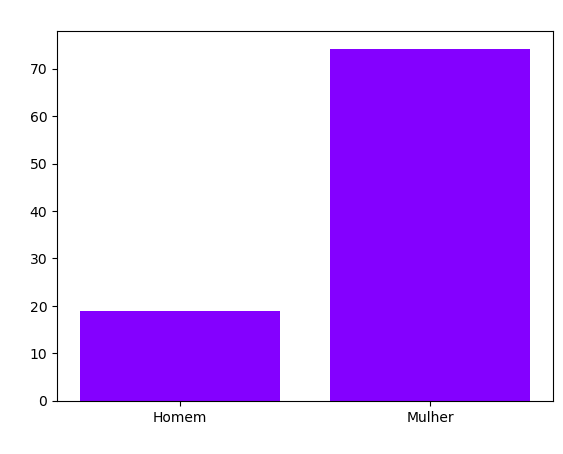

In [5]:
# Criando um gráfico de barras
plt.bar(["Homem", "Mulher"], [taxa_homem*100, taxa_mulher*100],capsize=10,color='#8400ff')

plt.style.use("dark_background")

# Adicionando rótulos e título ao gráfico
plt.xlabel("Gênero", color='white')
plt.ylabel("Taxa de Sobrevivência", color='white')
plt.title("Taxa de Sobrevivência por Gênero", color='white')

# Adicionando os valores das taxas acima das barras
for i, v in enumerate([taxa_homem*100, taxa_mulher*100]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center", fontweight="bold", color='white')

# Exibindo o gráfico
plt.show()

A diferença da taxa de sobrevivência entre homens e mulheres é bem significante, outros fatores também interferiram bastante, como idade e classe social. Conforme análise realizada anteriormente na aula, assim sendo, pulei a análise descritiva desses outros fatores.

### Tratamento dos dados

Diferente do Random Forest, na Linear Regression é importe ter dados mais tratados para o modelo conseguir fazer os cálculos, para isso o primeiro passo que tomei foi eliminar as colunas que não fazem parte das variáveis independentes do modelo.

In [6]:
#Excluindo features irrelevantes
treino.drop('Name',axis = 1, inplace = True)
treino.drop('Ticket',axis = 1, inplace = True)
treino.drop('Cabin',axis = 1, inplace = True)
treino.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Prossegui em apagar todas as linhas que continham NaN.

De 891 linhas o resultado do processo diminuiu para 712 linhas.

In [7]:
treino = treino.dropna()

### Variáveis categóricas em Regressão Linear:

A divisão entre os gêneros é importe para o resultado do modelo, conforme mostrado na parte de Análise Descritiva dos Gêneros, mas não consigo usá-la tratando ela como uma string,já que o modelo de regressão Linear funciona apenas com variáveis contínuas, então eu resolvi tomar duas estratégias para lidar com esse problema, a primeira estratégia, para o meu tipo de conjunto de dados é a correta, tratando os valores categóricos como uma **Codificação Dummy** *(One-Hot Encoding).* 

> Nessa abordagem, você converte cada categoria da variável categórica em uma nova coluna binária (0 ou 1). Cada coluna representará uma categoria específica e indicará se essa categoria está presente (1) ou não (0) para cada observação. Isso permite que a informação categórica seja representada numericamente e seja utilizada no modelo.



&nbsp;
***

Já a segunda estratégia, incorreta, arbitrariamente eu inseri valores para cada variável, isso burla a filtro de dados contínuos mas as variáveis recebem valores que serão erroneamente correlacionados.

***
&nbsp;

Outros exemplos de estratégias disponíveis, mas que não são adequadas para estas variáveis são:

1. > Codificação Ordinal: Se a variável categórica tiver uma ordem natural (por exemplo, baixo, médio, alto), você pode atribuir valores numéricos para representar essa ordem. No entanto, isso deve ser feito com cuidado, pois pode implicar uma relação linear que pode não ser adequada para todas as variáveis categóricas.
 
2. > Codificação de Números Inteiros: Se a variável categórica tiver categorias que podem ser mapeadas diretamente para valores numéricos (por exemplo, mês do ano: janeiro = 1, fevereiro = 2, etc.), você pode usar essa codificação.

3. > Regressão Linear Generalizada (Generalized Linear Regression): Em alguns casos, é possível estender a regressão linear para acomodar variáveis categóricas sem codificação. Isso é feito por meio de técnicas de Regressão Linear Generalizada (GLM), como a Regressão Linear com Efeitos Fixos ou a Regressão Linear com Variáveis Dummies.

### Codificação Dummy

In [8]:
temp = pd.DataFrame(treino)

# Aplicando a codificação dummy na coluna "Sex" e "Embarked"
dummy = pd.get_dummies(temp, columns=["Sex","Embarked"])

# Exibindo o DataFrame original e o DataFrame após a codificação dummy
print("DataFrame original:")
print(temp)

print("\nDataFrame após codificação dummy:")
print(dummy)

DataFrame original:
     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
885          886         0       3  female  39.0      0      5  29.1250   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4   

## Resultado do modelo de LR com Codificação Dummy

In [9]:
#Definindo variáveis preditoras e variável target
y = dummy['Survived']
x = dummy.drop('Survived', axis=1)

#Separando os dados em treino e teste
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,test_size = 0.3)

#Criando o modelo
modelo = LinearRegression()
modelo.fit(x_treino,y_treino)

#Calculando o coeficiente R2
resultado = modelo.score(x_teste,y_teste)
print(resultado)

0.4260554368724445


### Atribuição arbitrária para valores categóricos

In [10]:
df1 = pd.DataFrame(treino)

# Mapeando os valores usando um dicionário
sex_mapping = {
    "female": 1,
    "male": 2
}

# Substituindo os valores da coluna "Sex" usando o método "map"
df1["Sex"] = df1["Sex"].map(sex_mapping)

# Resultado final
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,2,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,2,35.0,0,0,8.0500,S


O mesmo processo se repetiu com os dados da origem do embarque, a coluna Embarked, gerando o dataframe df2.

In [11]:
df2 = pd.DataFrame(df1)

# Mapeando os valores usando um dicionário
place_mapping = {
    "S": 1,
    "C": 2,
    "Q":3
}

# Substituindo os valores da coluna "Sex" usando o método "map"
df2["Embarked"] = df2["Embarked"].map(place_mapping)

# Resultado final
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,2,22.0,1,0,7.2500,1
1,2,1,1,1,38.0,1,0,71.2833,2
2,3,1,3,1,26.0,0,0,7.9250,1
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,2,35.0,0,0,8.0500,1


Com os dados tratados, segui com a aplicação do modelo de Regressão Linear.

### Resultado do modelo de LR com atribuição arbitrária

In [12]:
#Definindo variáveis preditoras e variável target
y = df2['Survived']
x = df2.drop('Survived', axis=1)

#Separando os dados em treino e teste
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,test_size = 0.3)

#Criando o modelo
modelo = LinearRegression()
modelo.fit(x_treino,y_treino)

#Calculando o coeficiente R2
resultado = modelo.score(x_teste,y_teste)
print(resultado)

0.3530968784020798


## Conclusão

Embora as duas abordagens não tenham dado uma diferença muito grande, sendo de 5% pelo método correto comparado ao incorreto, é importante tomar sempre a estratégia correta para cada conjunto de dado,além disso, para todos os casos o modelo de Linear Regression deu um resultado bem baixo comparado a modelos mais adequados como o Random Forest, a razão disto é que o Linear Regression é um modelo de variáveis contínuas que melhora seus resultados a medida que a correlação entre os dados da variável dependente e independente é mais forte, principalmente quando esses eixos tratam de uma única dimensão, o que não foi o caso deste exercício. 

* Linear Regression: 39%
* Random Forest: 77% [exercício aqui](https://www.kaggle.com/code/wesleypdasilva/desafio-titanic-random-forest)